In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Problema 1:
Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la funcion debe devolver una imagen la cual tenga activos los canales de color segu´n los siguientes puntos:

+ Si el par´ametro color vale 1, la imagen debe mostrar activos u´nicamente el color azul.
+ Si el par´ametro color vale 2, la imagen debe mostrar activos u´nicamente el color verde.
+ Si el par´ametro color vale 3, la imagen debe mostrar activos u´nicamente el color rojo.
+ Si el par´ametro color vale 10, la imagen debe mostrar activos u´nicamente los colores rojo y verde.
+ Si el par´ametro color vale 20, la imagen debe mostrar activos u´nicamente los colores verde y azul.
+ Si el par´ametro color vale 30, la imagen debe mostrar activos u´nicamente los colores azul y rojo.

In [17]:
def ImagenColor(imagen, color: int):
    img=cv2.imread(imagen)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    hgt=img.shape[0]
    wgt=img.shape[1]
        
    monocromo = np.zeros((hgt,wgt,3))

    for i in range(0, hgt):
        for j in range(0, wgt):
            pixel=img[i,j]
            #extraemos los canales
            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]
            if color == 1:
                monocromo[i,j] = [0, 0, blue] #aplicamos transformacion azul
            elif color == 2:
                monocromo[i,j] = [0, green, 0] #aplicamos transformacion verde
            elif color == 3:
                monocromo[i,j] = [red, 0, 0] #aplicamos transformacion rojo
            elif color == 10:
                monocromo[i,j] = [red, green, 0] #aplicamos transformacion rojo verde
            elif color == 20:
                monocromo[i,j] = [0, green, blue] #aplicamos transformacion verde azul
            elif color == 30:
                monocromo[i,j] = [red, 0, blue] #aplicamos transformacion rojo azul
            else:
                monocromo[i,j] = [red, green, blue] #aplicamos transformacion rojo azul
    cv2.imwrite("monocromo.jpg",monocromo)
    monocromo= cv2.imread("monocromo.jpg")
    monocromo= cv2.cvtColor(monocromo, cv2.COLOR_BGR2RGB)
    plt.imshow(monocromo)
    plt.show()

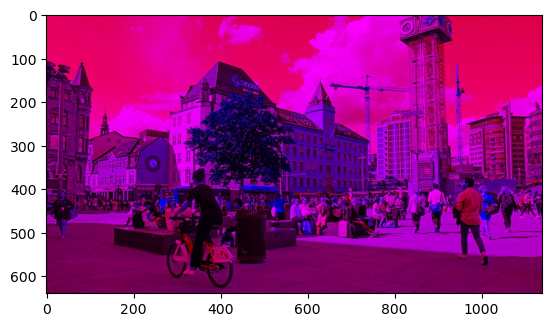

In [20]:
ImagenColor("noruega-intro.jpg", 30)

#### Problema 2:
En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises, estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una funci´on que dadas las 3 imagenes se construya la imagen original a color.

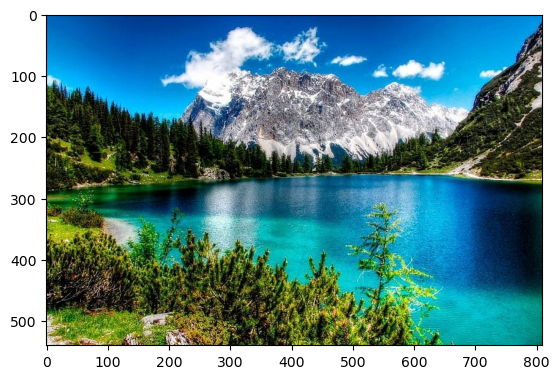

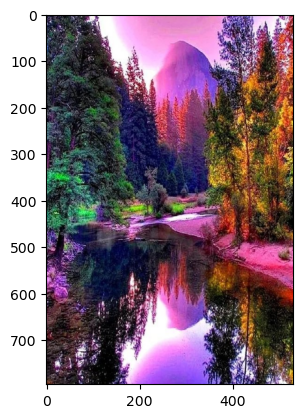

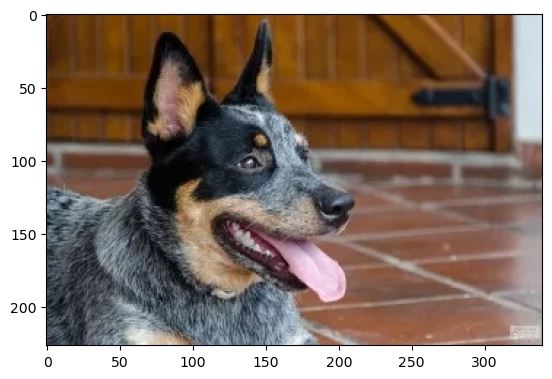

In [3]:
def construir_imagen_color(image_red, image_green, image_blue, numero=1):
    # Crear una imagen a color con tres canales vacíos
    img_R = cv2.imread(image_red, cv2.IMREAD_GRAYSCALE)
    img_G = cv2.imread(image_green, cv2.IMREAD_GRAYSCALE)
    img_B = cv2.imread(image_blue, cv2.IMREAD_GRAYSCALE)
    img_file = "imagen_color"+str(numero)+".jpg"
    
#    hgt, wdt = img_R.shape
#    img_RGB = np.zeros((hgt, wdt, 3))

    # Asignar los canales a la imagen a color
#    img_RGB[:, :, 0] = img_B  # Canal azul
#    img_RGB[:, :, 1] = img_G  # Canal verde
#    img_RGB[:, :, 2] = img_R  # Canal rojo

    img_RGB = cv2.merge((img_B, img_G, img_R))
   # Mostrar la imagen a color resultante
#    cv2.imshow("Imagen Color", img_RGB)
#    cv2.waitKey(0)
#    cv2.destroyAllWindows()
    cv2.imwrite(img_file, img_RGB)
    img_RGB= cv2.imread(img_file)
    img_RGB= cv2.cvtColor(img_RGB, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

imagen_color1 = construir_imagen_color("imagen1/imagen1_salida_gray_rojo.jpg", "imagen1/imagen1_salida_gray_verde.jpg", "imagen1/imagen1_salida_gray_azul.jpg")
imagen_color2 = construir_imagen_color("imagen2/imagen2_salida_gray_rojo.jpg", "imagen2/imagen2_salida_gray_verde.jpg", "imagen2/imagen2_salida_gray_azul.jpg")
imagen_color3 = construir_imagen_color("imagen3/perro_salida_gray_rojo.jpg", "imagen3/perro_salida_gray_verde.jpg", "imagen3/perro_salida_gray_azul.jpg")

